### Imports

In [1]:
%matplotlib inline
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import xarray as xr
from pathlib import Path
from pycurrents.adcp.rdiraw import Multiread

import velosearaptor

%reload_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

## Moored ADCP Continuous Ping Processing

**Test data**
There are several ADCP data files in the testing directory. Here we use a subset of data from the 75kHz ADCP on the NESMA mooring.

In [2]:
raw_data = Path("../velosearaptor/tests/data/continuous_pings_24607000.000")

In [3]:
meta_data = {
    "mooring": "test",
    "sn": 24607,
    "project": "test",
    "lon": 0,
    "lat": 0,
}
tgridparams = dict(dt_hours=0.1)

Set up a processing object. We will take care of the editing parameters in a little bit.

In [4]:
a = velosearaptor.madcp.ProcessADCP(
    raw_data,
    meta_data=meta_data,
    tgridparams=tgridparams,
    verbose=False,
)

No time drift parameters provided, not applying any clock correction.
No depth gridding parameters provided, using default values.
No edit parameters provided, using default values.


no burst average


Reading raw data...


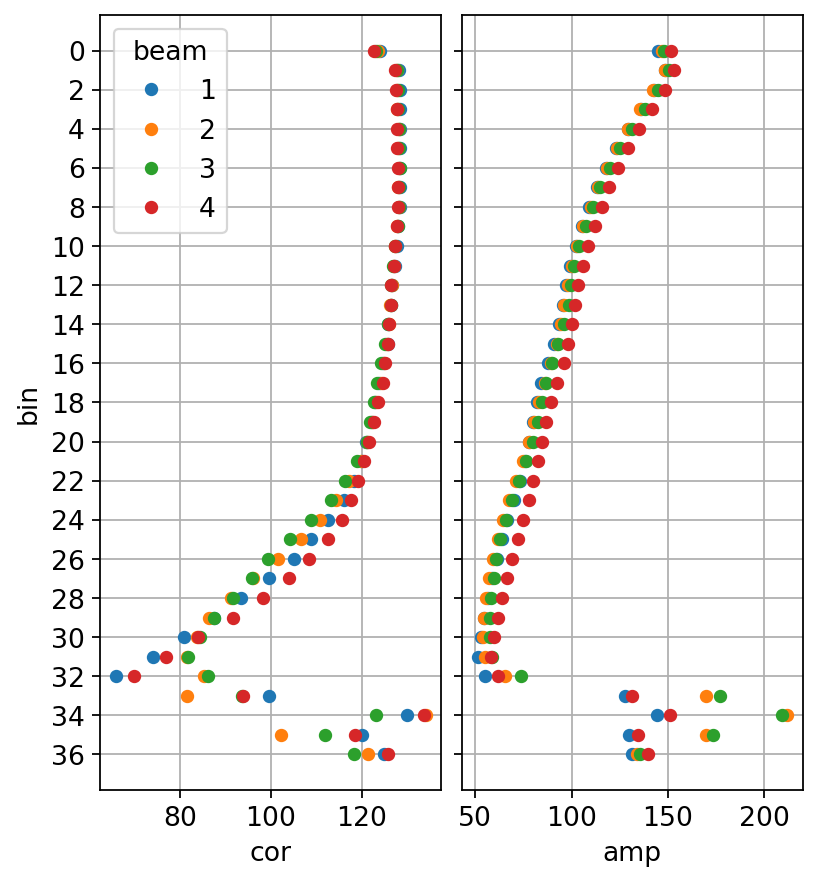

In [5]:
a.plot_echo_stats()

In [6]:
binmask = a.generate_binmask(np.arange(32, 37, 1))
binmask[0] = True
editparams = dict(maskbins=binmask)
a.parse_editparams(editparams=editparams)

In [7]:
a.average_ensembles()

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 445/445 [00:10<00:00, 44.34it/s]


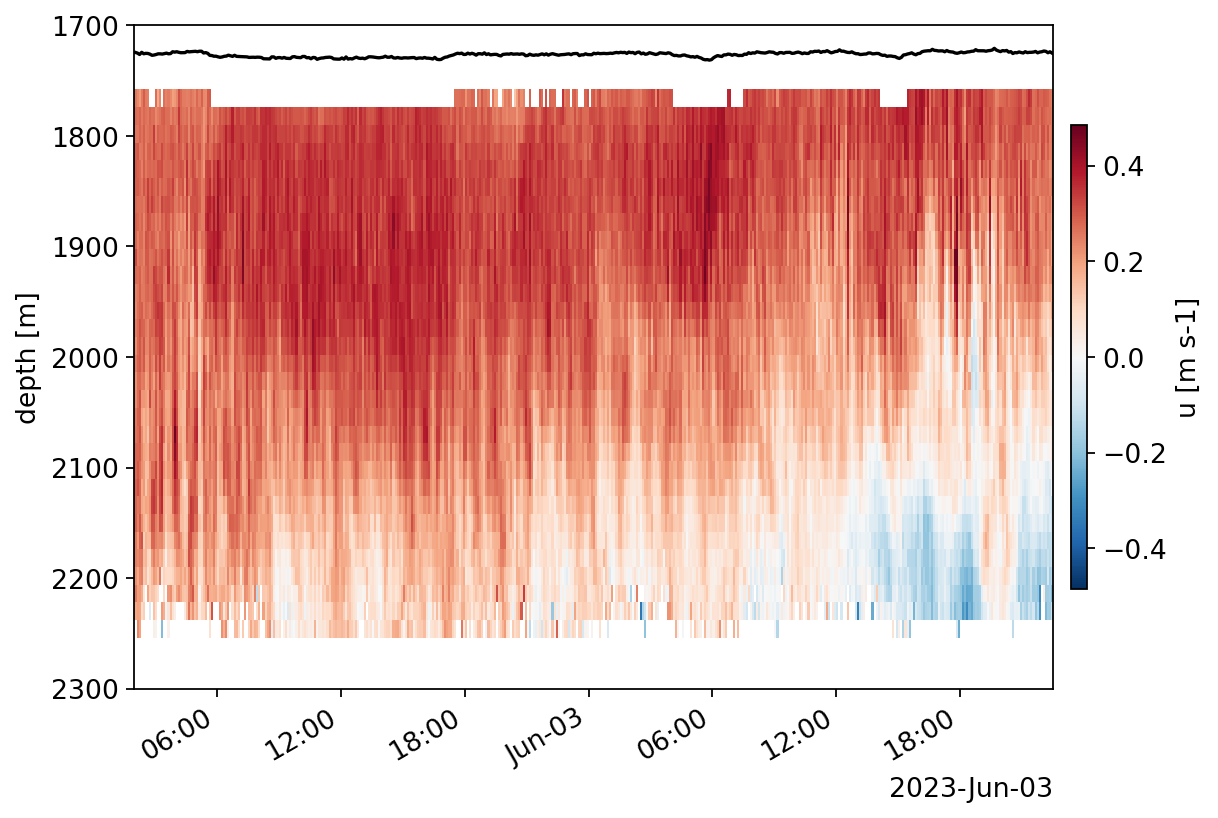

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7.5, 5), constrained_layout=True)

a.ds.u.plot(
    ax=ax,
    cbar_kwargs=dict(aspect=30, shrink=0.7, ticks=mpl.ticker.MaxNLocator(5), pad=0.02),
)
a.ds.xducer_depth.plot(ax=ax, color="k")
ax.set(ylim=(2300, 1700), ylabel="depth [m]", xlabel=None)
velosearaptor.adcp._concise_date(ax)